# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
!ls Banana_Linux

Banana_Data  Banana.x86  Banana.x86_64


In [2]:
env = UnityEnvironment(file_name="./Banana_Linux_NoVis/Banana.x86_64")

# To run the visual environment uncomment the next line
#env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

When finished, you can close the environment.

In [ ]:
#env.close()

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            
action = np.random.randint(action_size)        # select an action
next_state = env.step(action)['BananaBrain']
print(next_state.vector_observations[0])

In [ ]:
state

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

## 5. Networkr architecture

Below a neural network's architecture it's definded. Let's see how it is the output after a forward pass of the environment's state.


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from collections import OrderedDict

In [ ]:
class MyModel(nn.Module):
    def __init__(self,sate_size, action_size, seed, hidden_layers, p):
        super(MyModel, self).__init__()
        # Set random seed
        self.seed = torch.manual_seed(seed)
        # Define input and output for each hidden layer
        layer_sizes = zip(hidden_layers[:-1], hidden_layers[1:])
        # Create ModuleList and add input layer
        self.hl = nn.ModuleList([nn.Linear(state_size, hidden_layers[0])])
        # Add hidden layers to the ModuleList
        self.hl.extend([nn.Linear(h1, h2) for h1, h2 in layer_sizes])
        # Add output layer
        self.output = nn.Linear(hidden_layers[-1], action_size)
        # Add the probability for a node to be dropped at each layer
        self.dropout = nn.Dropout(p=p)
    
    def forward(self, x):
        for linear in self.hl:
            x = F.relu(linear(x))
            x = self.dropout(x)
                
        return self.output(x)

In [ ]:
model = MyModel(37,4,0,[54,16],.1)
model

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]
state = torch.from_numpy(state).float().unsqueeze(0)
state
#model.forward(state)



In [ ]:
model.forward(state)

## Train

In [6]:
from dqn_agent import Agent
from collections import deque

Episode 100	Average Score: 1.11
Episode 200	Average Score: 5.00
Episode 300	Average Score: 7.93
Episode 400	Average Score: 8.48
Episode 500	Average Score: 9.84
Episode 600	Average Score: 12.44
Episode 620	Average Score: 13.03
Environment solved in 520 episodes!	Average Score: 13.03


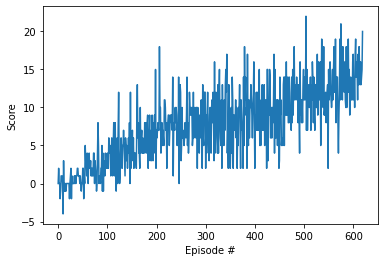

In [7]:
# Instance of an agent to interact with the environment
agent = Agent(state_size=37, action_size=4, hidden_layers=[18,9], p=0, seed=0)

def dqn(n_episodes=2000, max_t=250, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        score = 0
        while True:
            state = env_info.vector_observations[0]  # get the current state
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)  # this statement launches the learning phase
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [12]:
env.close()

In [10]:
def run_agent():
    env_info = env.reset(train_mode=False)[brain_name]
    score = 0
    while True:
        state = env_info.vector_observations[0]  # get the current state
        action = agent.act(state)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        state = env_info.vector_observations[0]        # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward
        if done:
            return score


In [ ]:
for i in range(100):
    run_agent()

In [14]:
hundred_runs = [run_agent() for i in range(1)]
hundred_runs

In [15]:
env_info = env.reset(train_mode=False)[brain_name]
score = 0
while True:
    state = env_info.vector_observations[0]  # get the current state
    action = agent.act(state)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    state = env_info.vector_observations[0]        # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward
    if done:
        return score

KeyboardInterrupt: 

## Saving the model

In [8]:
checkpoint = {'state_size': 37,
              'action_size': 4,
              'hidden_layers':[18,9], 
              'p':0, 
              'seed':0,
              'state_dict': agent.qnetwork_target.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

In [9]:
#checkpoint = torch.load('checkpoint.pth')
checkpoint

{'state_size': 37,
 'action_size': 4,
 'hidden_layers': [18, 9],
 'p': 0,
 'seed': 0,
 'state_dict': OrderedDict([('hl.0.weight',
               tensor([[-0.0042,  0.0019, -0.0332, -0.0384,  0.0440, -0.0412,  0.0340,
                         0.1042,  0.1362,  0.1232,  0.1886, -0.6663, -0.2183, -0.1953,
                        -1.2479,  0.0197,  0.0420,  0.0463,  0.0370,  0.0001,  0.2111,
                         0.1635, -0.0764, -0.2658, -1.2271, -0.0547, -0.0379,  0.0607,
                         0.0611,  0.0589, -0.3189,  0.1211,  0.1263,  0.2343,  0.2072,
                        -0.0075,  0.0004],
                       [ 0.1087,  0.1781,  0.1242, -0.0005, -0.1190,  0.0776, -0.1473,
                        -0.1631, -0.4078, -0.7985, -0.0570, -0.0017,  0.0653,  0.1002,
                         0.0807,  0.1429,  0.0534, -0.1207, -0.1960, -0.5320, -0.1982,
                        -0.0146, -0.0519, -0.0125,  0.1884,  0.0870, -0.1503, -0.0180,
                        -0.3431, -0.9447,  0

## Loading the model

In [14]:
def load_trained_agent(filepath):
    checkpoint = torch.load(filepath)
    agent = Agent(
                  checkpoint['state_size'],
                  checkpoint['action_size'],
                  checkpoint['hidden_layers'],
                  checkpoint['p'],
                  checkpoint['seed'])

    agent.qnetwork_target.load_state_dict(checkpoint['state_dict'])
    
    return agent

In [18]:
#env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")
env = UnityEnvironment(file_name="./Banana_Linux_NoVis/Banana.x86_64")

OSError: handle is closed

ERROR:root:Exception calling application: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/home/chuqui/anaconda3/envs/drlnd/lib/python3.6/site-packages/grpc/_server.py", line 385, in _call_behavior
    return behavior(argument, context), True
  File "/home/chuqui/anaconda3/envs/drlnd/lib/python3.6/site-packages/unityagents/rpc_communicator.py", line 25, in Exchange
    self.child_conn.send(request)
  File "/home/chuqui/anaconda3/envs/drlnd/lib/python3.6/multiprocessing/connection.py", line 206, in send
    self._send_bytes(_ForkingPickler.dumps(obj))
  File "/home/chuqui/anaconda3/envs/drlnd/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/home/chuqui/anaconda3/envs/drlnd/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


In [22]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

ERROR:root:Exception calling application: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/home/chuqui/anaconda3/envs/drlnd/lib/python3.6/site-packages/grpc/_server.py", line 385, in _call_behavior
    return behavior(argument, context), True
  File "/home/chuqui/anaconda3/envs/drlnd/lib/python3.6/site-packages/unityagents/rpc_communicator.py", line 25, in Exchange
    self.child_conn.send(request)
  File "/home/chuqui/anaconda3/envs/drlnd/lib/python3.6/multiprocessing/connection.py", line 206, in send
    self._send_bytes(_ForkingPickler.dumps(obj))
  File "/home/chuqui/anaconda3/envs/drlnd/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/home/chuqui/anaconda3/envs/drlnd/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


In [26]:
# Instantiate an agent with an already trained Q-Network
agent = load_trained_agent('checkpoint.pth')

env_info = env.reset(train_mode=False)[brain_name]
score = 0
while True:
    state = env_info.vector_observations[0]  # get the current state
    action = agent.act(state)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward
    if done:
        break

print('Score: {:.2f}'.format(score))

Score: 0.00


In [ ]:
#env.close()